In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#import data
H1_data = pd.read_csv("GJ_1H_BID_NW.csv")

In [3]:
#returns series length scales
delta_t2 = 2;
delta_t1 = 3;
delta_t0 = 4;

#bins per scale
numBins_r0 = 150; 
numBins_r1 = 150; 

In [5]:
#create returns series 

r1 = [np.log(H1_data["Close"][i + delta_t1] / H1_data["Close"][i]) for i in range(len(H1_data["Close"])-delta_t1)]
r0 = [np.log(H1_data["Close"][i + delta_t0] / H1_data["Close"][i]) for i in range(len(H1_data["Close"])-delta_t0)]
r2 = [np.log(H1_data["Close"][i + delta_t2] / H1_data["Close"][i]) for i in range(len(H1_data["Close"])-delta_t2)]

#make all series the same length
dif_r2_r0 = len(r2) - len(r0)
r2 = r2[:-dif_r2_r0]

dif_r1_r0 = len(r1) - len(r0)
r1 = r1[:-dif_r1_r0]

In [6]:
#standardise the returns series

r2 = r2/(10*np.std(r2))
r0 = r0/(10*np.std(r0))

In [7]:
#bin the time series into the number of bins

numBins_r1 = 150;
numBins_r0 = 150;

#Bins for r2
lowLimit_r2 = min(r2);
upLimit_r2 = max(r2)+ 1;
binLimits_r2 = np.linspace(lowLimit_r2, upLimit_r2, numBins_r1 +1);
whichBin_r2 = np.digitize(r2, binLimits_r2)

#Bins for r1
lowLimit_r1 = min(r1);
upLimit_r1 = max(r1)+ 1;
binLimits_r1 = np.linspace(lowLimit_r1, upLimit_r1, numBins_r1 +1);
whichBin_r1= np.digitize(r1, binLimits_r1)

#Bins for r0
lowLimit_r0 = min(r0);
upLimit_r0 = max(r0)+ 1;
binLimits_r0 = np.linspace(lowLimit_r0, upLimit_r0, numBins_r0 +1);
whichBin_r0= np.digitize(r0, binLimits_r0)

In [8]:
#compute the mean of each bin

binMean_r0 = []

for i in range(1,numBins_r0+1):
    binMembers_r0 = [r0[idx] for idx, element in enumerate(whichBin_r0) if element == i]
    binMean_r0.append(np.mean(binMembers_r0))

    
binMean_r1 = []

for i in range(1,numBins_r1+1):
    binMembers_r1 = [r1[idx] for idx, element in enumerate(whichBin_r1) if element == i]
    binMean_r1.append(np.mean(binMembers_r1))
    
binMean_r2 = []

for i in range(1,numBins_r1+1):
    binMembers_r2 = [r2[idx] for idx, element in enumerate(whichBin_r2) if element == i]
    binMean_r2.append(np.mean(binMembers_r2))

C:\Users\Steven\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Steven\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
r2_Binned = [binMean_r2[idx - 1] for idx in whichBin_r2]
r1_Binned = [binMean_r1[idx - 1] for idx in whichBin_r1]
r0_Binned = [binMean_r0[idx - 1] for idx in whichBin_r0]

binned_dataframe = pd.DataFrame(
    {'r2_Binned': r2_Binned,
     'r1_Binned': r1_Binned,
     'r0_Binned': r0_Binned
    })

In [10]:
#define function to compute probability of items in each returns series
def tabulate(vector):
    vals, counts = np.unique(vector, return_counts=True)
    percentage = [count/len(vector) * 100 for count in counts]
    return np.array(vals), np.array(counts), np.array(percentage)

In [11]:
#compute p(r2|r0) 
vals_r0, counts_r0, percentage_r0 = tabulate(r0_Binned)
Prob_r0 = percentage_r0/100
MassPDF_r2_r0_df = pd.crosstab(index=binned_dataframe['r2_Binned'], columns=binned_dataframe['r0_Binned'])
MassPDF_r2_r0 = MassPDF_r2_r0_df.to_numpy()
JointPDF_r2_r0 = MassPDF_r2_r0/(len(r2));
CondPDF_r2_r0 = np.linalg.solve(np.diag(Prob_r0).conj().T, JointPDF_r2_r0.conj().T).conj().T

In [12]:
#compute p(r2|r1) 
vals_r1, counts_r1, percentage_r1 = tabulate(r1_Binned)
Prob_r1 = percentage_r1/100
MassPDF_r2_r1_df = pd.crosstab(index=binned_dataframe['r2_Binned'], columns=binned_dataframe['r1_Binned'])
MassPDF_r2_r1 = MassPDF_r2_r1_df.to_numpy()
JointPDF_r2_r1 = MassPDF_r2_r1/(len(r1));
CondPDF_r2_r1 = np.linalg.solve(np.diag(Prob_r1).conj().T, JointPDF_r2_r1.conj().T).conj().T

In [13]:
#compute p(r1|r0) 
vals_r0, counts_r0, percentage_r0 = tabulate(r0_Binned)
Prob_r0 = percentage_r0/100
MassPDF_r1_r0_df = pd.crosstab(index=binned_dataframe['r1_Binned'], columns=binned_dataframe['r0_Binned'])
MassPDF_r1_r0 = MassPDF_r1_r0_df.to_numpy()
JointPDF_r1_r0 = MassPDF_r1_r0/(len(r1));
CondPDF_r1_r0 = np.linalg.solve(np.diag(Prob_r0).conj().T, JointPDF_r1_r0.conj().T).conj().T

In [17]:
#compute champman kolmogorov
Chapman_Kolgrv = np.matmul(CondPDF_r2_r1, CondPDF_r1_r0)

In [25]:
# Unique occurences per bin
Mv0 = np.unique(r0_Binned);
My1 = np.unique(r2_Binned);

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


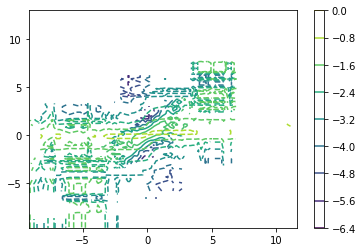

In [26]:
# Plots contour plot
Log_Cond20 = np.log10(np.abs(CondPDF_r2_r0));
Log_ChapKol = np.log10(np.abs(Chapman_Kolgrv));
plt.contour(Mv0,My1,Log_Cond20);
plt.contour(Mv0,My1,Log_ChapKol, linestyles = 'dashed');
plt.colorbar()